In [1]:
# importing the necessory libraries

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# Loading the dataset

train = pd.read_csv("./dataset/train_E6oV3lV.csv")
test = pd.read_csv("./dataset/test_tweets_anuFYb8.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

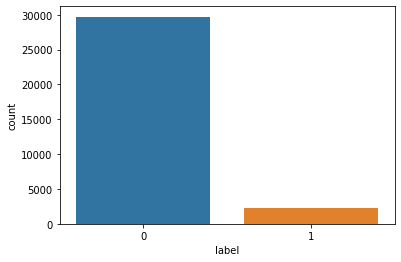

In [5]:
import seaborn as sns
ax = sns.countplot(train.label)
    

In [6]:
# removing usernames from tweet
train['new_tweet'] = train.tweet.str.replace('@user' , '')
train.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
#Removing Punctuations, Numbers, and Special Characters

train['new_tweet'] = train['new_tweet'].str.replace("[^a-zA-Z#]", " ")
train['new_tweet'] = train['new_tweet'].str.replace("#", "")
train.head()


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [8]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(train['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [9]:
#tokenization
train['new_tweet'] = train['new_tweet'].apply(lambda x: x.split())
train.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [10]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

train['new_tweet']= train['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
train.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [11]:
# remove stopwords and punctuations
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words("english")

import string

def process(text):
    nonpunc = set(char for char in list(text) if char not in string.punctuation)
    nonpunc = " ".join(nonpunc)
    
    return [word for word in nonpunc.lower().split() if word.lower() not in stopwords]

train['new_tweet'] = train['new_tweet'].apply(process)

In [12]:
train.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[dysfunct, father, drag, run, kid, selfish]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[pdx, caus, disapoint, offer, use, getthank, c..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[love, time, model, take, ur, u]"
4,5,0,factsguide: society now #motivation,"[factsguid, societi, motiv]"


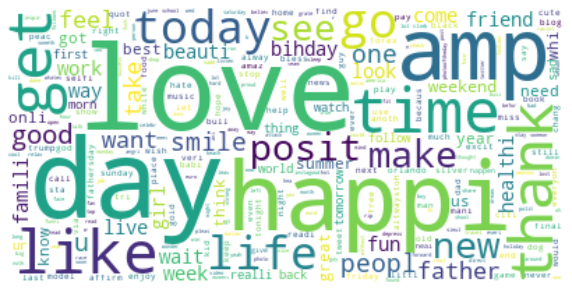

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# split sentences to get individual words
words = []
for line in train['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
train['new_tweet'] = train['new_tweet'].apply(string)
train.head()


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,dysfunct father drag run kid selfish
1,2,0,@user @user thanks for #lyft credit i can't us...,pdx caus disapoint offer use getthank credit v...
2,3,0,bihday your majesty,majesti bihday
3,4,0,#model i love u take with u all the time in ...,love time model take ur u
4,5,0,factsguide: society now #motivation,factsguid societi motiv


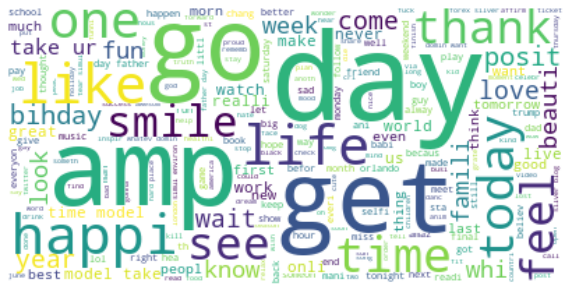

In [16]:
positive = [r for r in train['new_tweet'][train['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

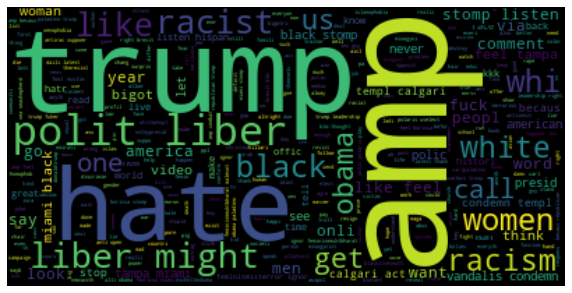

In [17]:
negative = [r for r in train['new_tweet'][train['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
train.drop(["id" , "tweet"] , axis=1 , inplace=True)

train.head()

,label,new_tweet
0,0,dysfunct father drag run kid selfish
1,0,pdx caus disapoint offer use getthank credit v...
2,0,majesti bihday
3,0,love time model take ur u
4,0,factsguid societi motiv


In [20]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train["new_tweet"], 
                                                    train["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [22]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27310)
(25569, 27310)


In [23]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27310)
(6393, 27310)


In [24]:
# model building

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
predictions = model.predict(x_test_tfidf)

In [26]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9612075707805412

In [27]:

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5895,   42],
       [ 206,  250]])

In [28]:
#f1-score
f1_score(y_test,predictions)

0.6684491978609626

In [29]:
predictions

array([0, 0, 1, ..., 0, 0, 1])

In [30]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

/home/chandrakanth/anaconda3/envs/sia_dev/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=400, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
log_predictions = logmodel.predict(x_test_tfidf)

In [32]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[5925,   12],
       [ 310,  146]])

In [33]:
f1_score(y_test,log_predictions)

0.47557003257328995

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.96324104489285

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=550,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[5925,   12],
       [ 310,  146]])

In [38]:
f1_score(y_test,alg_predictions)

0.47557003257328995

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , alg_predictions)*100

94.96324104489285